In [15]:
import matplotlib.pyplot as plt
import numpy as np
from alignment_functions.gal_groups import *

In [2]:
galaxy_catalog = Table.read('example_data/halo_selection_coords_ph00_z0.80.fits')
galaxy_catalog.rename_column('Z_noRSD', 'Z')

In [4]:
alignment_result = get_group_alignment(galaxy_catalog, print_progress=True, 
                                       n_sky_regions=10, pimax=30, max_proj_sep=150, max_neighbors=1000, n_Rbins=10, save_path='example_data/alignment_output.fits')

Making group catalog
Measuring alignment
Binning results
Results saved to  example_data/alignment_output.fits


In [12]:
# reading in previously saved results
alignment_result = Table.read('example_data/alignment_output.fits')

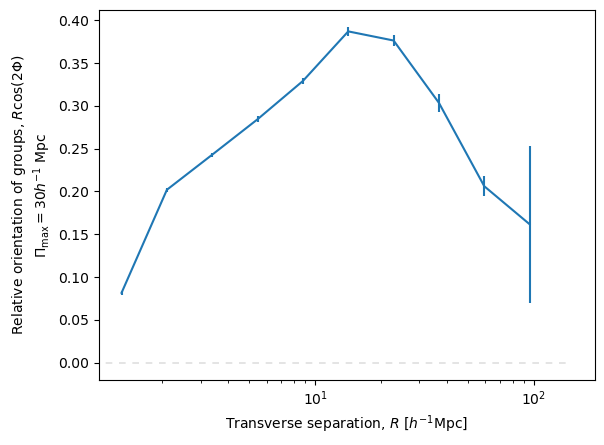

In [13]:
bin_centers = (alignment_result['R_bin_min'] + alignment_result['R_bin_max'])/2
plt.errorbar(bin_centers, bin_centers * alignment_result['relAang_plot'], yerr=bin_centers*alignment_result['relAng_plot_e'])

plt.xlabel(r'Transverse separation, $R$ [$h^{-1}$Mpc]')
plt.ylabel(r'Relative orientation of groups, $R$cos(2$\Phi$)'+'\n'+r'$\Pi_{\rm max} = 30h^{-1}$ Mpc')
plt.xscale('log')
# add dotted line at 0
plt.plot([0,150], [0,0], color='grey', linewidth=.3, zorder=0, dashes=(16,16));

To adjust for surgey geometry, let's measure the same signal relative to randoms

In [16]:
# shuffle the redshifts of the catalog to make a quick random catalog
random_catalog = galaxy_catalog
random_catalog['Z'] = np.random.permutation(random_catalog['Z'])

# measure orientation of groups relative to randoms
random_alignment_result = get_group_alignment(galaxy_catalog, catalog_for_tracers = random_catalog, print_progress=True, 
                                              n_sky_regions=10, pimax=30, max_proj_sep=150, max_neighbors=1000, n_Rbins=10, save_path='example_data/alignment_output_randoms.fits')

/global/common/software/desi/perlmutter/desiconda/20240425-2.2.0/conda/lib/python3.10/site-packages/astropy/table/table.py:3763: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


Making group catalog
Measuring alignment


/global/u1/c/clamman/IA/spec-IA/geometry_functions/coordinate_functions.py:158: RuntimeWarning: invalid value encountered in true_divide
  proj = np.sum(pos_diff*obs_vec, axis=1) / np.linalg.norm(obs_vec, axis=1)


Binning results
Results saved to  example_data/alignment_output_randoms.fits


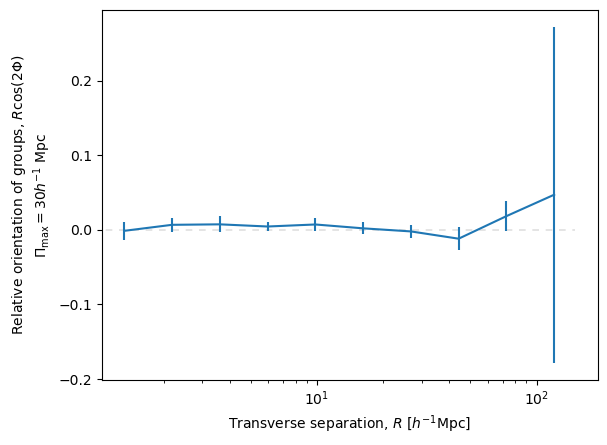

In [17]:
# reading in previously saved results
alignment_result_randoms = Table.read('example_data/alignment_output_randoms.fits')

bin_centers = (alignment_result_randoms['R_bin_min'] + alignment_result_randoms['R_bin_max'])/2
plt.errorbar(bin_centers, bin_centers * alignment_result_randoms['relAang_plot'], yerr=bin_centers*alignment_result_randoms['relAng_plot_e'])

plt.xlabel(r'Transverse separation, $R$ [$h^{-1}$Mpc]')
plt.ylabel(r'Relative orientation of groups, $R$cos(2$\Phi$)'+'\n'+r'$\Pi_{\rm max} = 30h^{-1}$ Mpc')
plt.xscale('log')
# add dotted line at 0
plt.plot([0,150], [0,0], color='grey', linewidth=.3, zorder=0, dashes=(16,16));

Here we just used one random catalog, but typically many sets should be used. get_group_alignment_randoms() will handle this.
    
The impact from randoms in this example catalog is fairly small, but let's subtract this from the main signal.

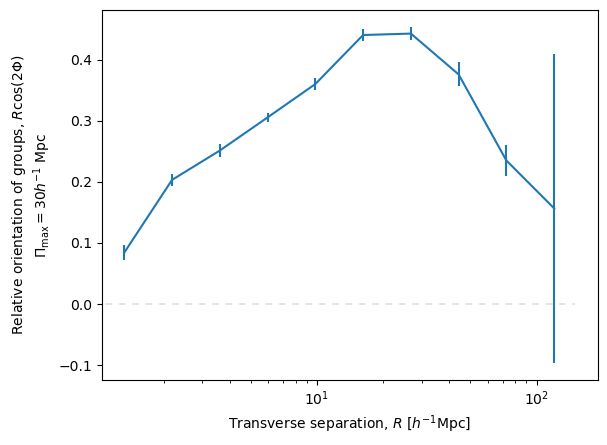

In [19]:
adjusted_signal = alignment_result['relAang_plot'] - alignment_result_randoms['relAang_plot']
adjusted_signal_e = np.sqrt(alignment_result['relAng_plot_e']**2 + alignment_result_randoms['relAng_plot_e']**2)

plt.errorbar(bin_centers, bin_centers * adjusted_signal, yerr=bin_centers*adjusted_signal_e)

plt.xlabel(r'Transverse separation, $R$ [$h^{-1}$Mpc]')
plt.ylabel(r'Relative orientation of groups, $R$cos(2$\Phi$)'+'\n'+r'$\Pi_{\rm max} = 30h^{-1}$ Mpc')
plt.xscale('log')
# add dotted line at 0
plt.plot([0,150], [0,0], color='grey', linewidth=.3, zorder=0, dashes=(16,16));